## Initialize

In [1]:
import os, pickle
import pylab as pl
import numpy as np
%matplotlib inline
import rtpipe
import rtlib_cython as rtlib
from astropy import coordinates, units
from scipy.optimize import curve_fit

from __future__ import print_function

2016-10-28 16:35:53,953 - py.warnings - WARNING - /users/claw/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)



## Take a look at bright event

In [2]:
loc,prop,st = rtpipe.parsecands.read_candidates('57633.66130137732/cands_16A-459_TEST_1hr_000.57633.66130137732_merge.pkl',
                                                returnstate=True)
st['filename'] = os.path.basename(st['filename'])
st['workdir'] = os.getcwd()
st['bdfdir'] = ''

2016-10-28 16:36:03,266 - rtpipe.parsecands - INFO - Read 2889 candidates from 57633.66130137732/cands_16A-459_TEST_1hr_000.57633.66130137732_merge.pkl.


In [3]:
rtpipe.reproduce.list_cands('57633.66130137732/cands_16A-459_TEST_1hr_000.57633.66130137732_merge.pkl', threshold=70)

2016-10-14 17:10:56,094 - rtpipe.parsecands - INFO - Read 5 candidates from 57633.66130137732/cands_16A-459_TEST_1hr_000.57633.66130137732_merge.pkl.
2016-10-14 17:10:56,095 - rtpipe.reproduce - INFO - Getting candidates...
2016-10-14 17:10:56,096 - rtpipe.reproduce - INFO - candnum: loc, SNR, DM (pc/cm3), time (s; rel)
2016-10-14 17:10:56,097 - rtpipe.reproduce - INFO - 0: [ 7 43 36  3  0  0], 85.7, 560.0, 0.0
2016-10-14 17:10:56,098 - rtpipe.reproduce - INFO - 1: [ 7 43 36  4  0  0], 79.2, 565.0, 0.0
2016-10-14 17:10:56,099 - rtpipe.reproduce - INFO - 2: [ 7 43 36  1  1  0], 76.0, 546.0, 0.0
2016-10-14 17:10:56,100 - rtpipe.reproduce - INFO - 3: [ 7 43 36  2  1  0], 73.0, 556.9, 0.0
2016-10-14 17:10:56,101 - rtpipe.reproduce - INFO - 4: [ 7 43 36  2  0  0], 86.3, 556.9, 0.0


## Get detection data and image
### also get larger image at maximal sensitivity

In [3]:
im,data = rtpipe.reproduce.plot_cand('57633.66130137732/cands_16A-459_TEST_1hr_000.57633.66130137732_merge.pkl', 
                                     threshold=70, candnum=4, returndata=True, savefile=False, savenoise=False,
                                     logfile=False, npix_max=4096, flaglist=[('badap', 3.0, 0.2)])

2016-10-28 16:36:03,279 - rtpipe.parsecands - INFO - Read 2889 candidates from 57633.66130137732/cands_16A-459_TEST_1hr_000.57633.66130137732_merge.pkl.
2016-10-28 16:36:03,280 - rtpipe.reproduce - INFO - Setting flaglist to [('badap', 3.0, 0.2)]
2016-10-28 16:36:03,281 - rtpipe.reproduce - INFO - Setting savenoise to False
2016-10-28 16:36:03,282 - rtpipe.reproduce - INFO - Setting logfile to False
2016-10-28 16:36:03,283 - rtpipe.reproduce - INFO - Setting npix_max to 4096
2016-10-28 16:36:03,286 - rtpipe.reproduce - INFO - Reproducing and visualizing candidate 4 at [ 7 43 36  2  0  0] with properties [  8.63080139e+01   4.73778279e-08  -3.84990986e-04   5.39926382e-04
   1.38285152e-01   7.20280177e-01  -2.91199491e-01   2.03324872e+00
   4.30538854e+01].
2016-10-28 16:36:03,289 - rtpipe.parsesdm - INFO - Setting (standard) key nsegments to 217
2016-10-28 16:36:03,290 - rtpipe.parsesdm - INFO - Setting (standard) key excludeants to []
2016-10-28 16:36:03,291 - rtpipe.parsesdm - INFO

Gridded 1.000 of data. Scaling fft by = 64.0
Pixel sizes (1.4", 1.1"), Field size 1983.3"


2016-10-28 16:36:47,231 - rtpipe - INFO - Made image with SNR min, max: -5.4, 117.9
2016-10-28 16:36:47,321 - rtpipe - INFO - Rephasing data to (l, m)=(-0.0004, 0.0005).


## Flux scale

In [4]:
calstring = """2.0520    2.89698    0.00279
2.1800    *******    *******
2.3080    *******    *******
2.4360    3.53585    0.00377
2.5640    3.69554    0.00376
2.6920    3.85507    0.00423
2.8200    4.00438    0.00486
2.9480    4.11069    0.00562
3.0520    4.20375    0.00631
3.1800    4.29385    0.00662
3.3080    4.36557    0.00715
3.4360    4.43684    0.00786
3.5640    4.46937    0.00850
3.6920    4.52488    0.00860
3.8200    4.53571    0.00969
3.9480    4.54625    0.00859""" # from Bryan

freq = []
calflux = []
caleflux = []
for line in calstring.split('\n'): 
    if '*' not in line:
        result = line.split()
        freq.append(float(result[0]))
        calflux.append(float(result[1]))
        caleflux.append(float(result[2]))
calflux = np.array(calflux).mean()
print('Mean cal flux: {0} Jy'.format(calflux))

Mean cal flux: 4.10533785714 Jy


## Show me!

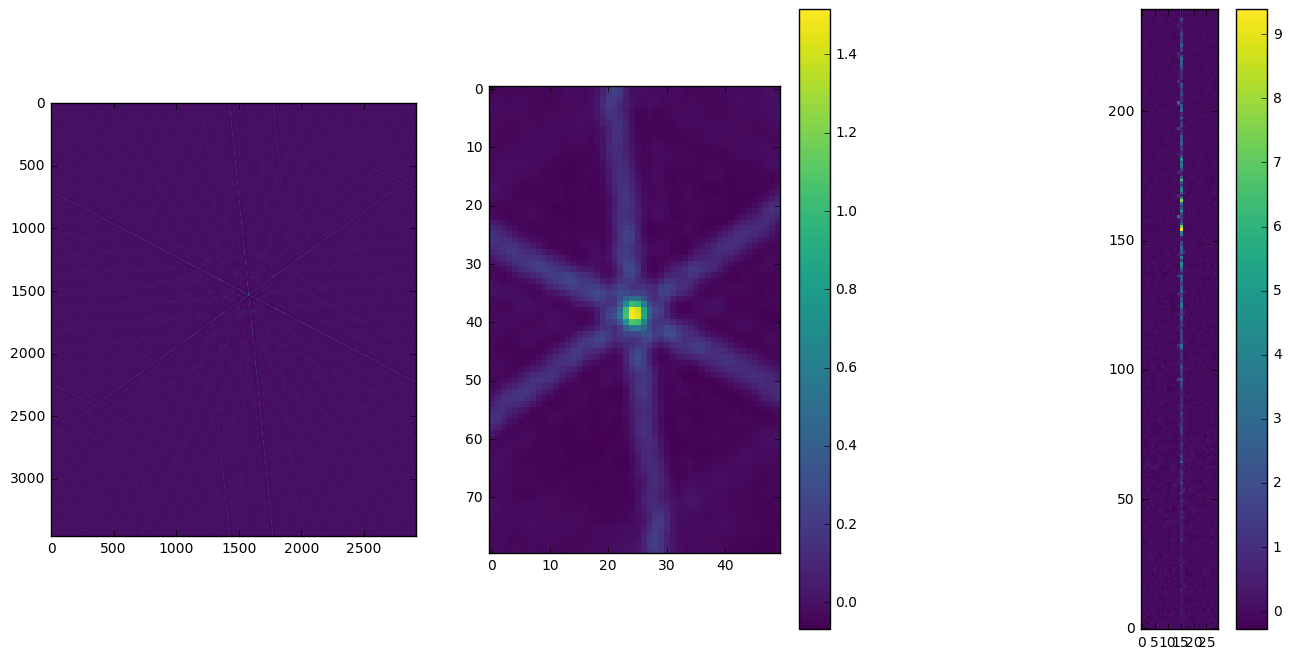

In [6]:
pl.figure(1, figsize=(16,8))
pl.subplot(131)
pl.imshow(calflux*im.transpose(), interpolation='nearest', cmap='viridis')
pl.subplot(132)
pl.imshow(calflux*im.transpose()[1495:1575,1550:1600], interpolation='nearest', cmap='viridis')
pl.colorbar()
pl.subplot(133)
pl.imshow(calflux*data.mean(axis=2).real.transpose(), interpolation='nearest', origin='bottom', cmap='viridis')
pl.colorbar()

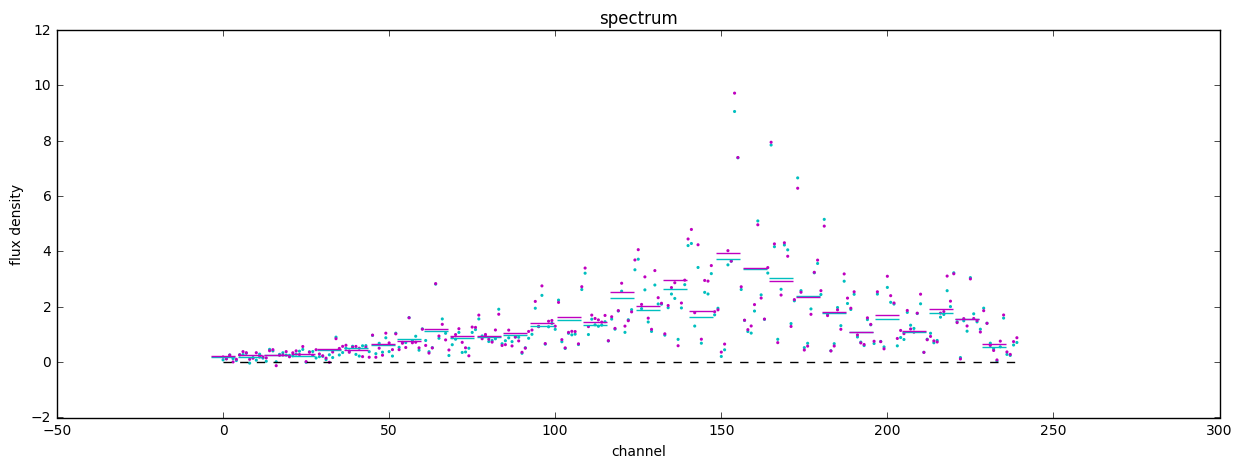

In [7]:
pl.figure(2, figsize=(15,5))
specRR = np.ma.masked_equal(calflux*data[15,:,0].real, 0.)
specLL = np.ma.masked_equal(calflux*data[15,:,1].real, 0.)
nch = len(specRR)
pl.scatter(range(nch), specRR, marker='.', c='c', edgecolors='none', s=20)
pl.scatter(range(nch), specLL, marker='.', c='m', edgecolors='none', s=20)
resamp = 8
pl.scatter(range(0, nch, resamp), specRR.reshape(nch/resamp, resamp).mean(axis=1), marker='_', c='c', s=300)
pl.scatter(range(0, nch, resamp), specLL.reshape(nch/resamp, resamp).mean(axis=1), marker='_', c='m', s=300)
pl.plot([0,nch],[0,0], 'k--')
pl.xlabel('channel')
pl.ylabel('flux density')
t = pl.title('spectrum')

In [8]:
sysflux = (specRR + specLL).mean()
print('Mean flux: {0} Jy'.format(sysflux))
print('Mean fluence: {0} Jy-ms'.format(sysflux*5))

Mean flux: 2.85188055038 Jy
Mean fluence: 14.2594027519 Jy-ms


Circular fraction (RR-LL): -0.047708372275


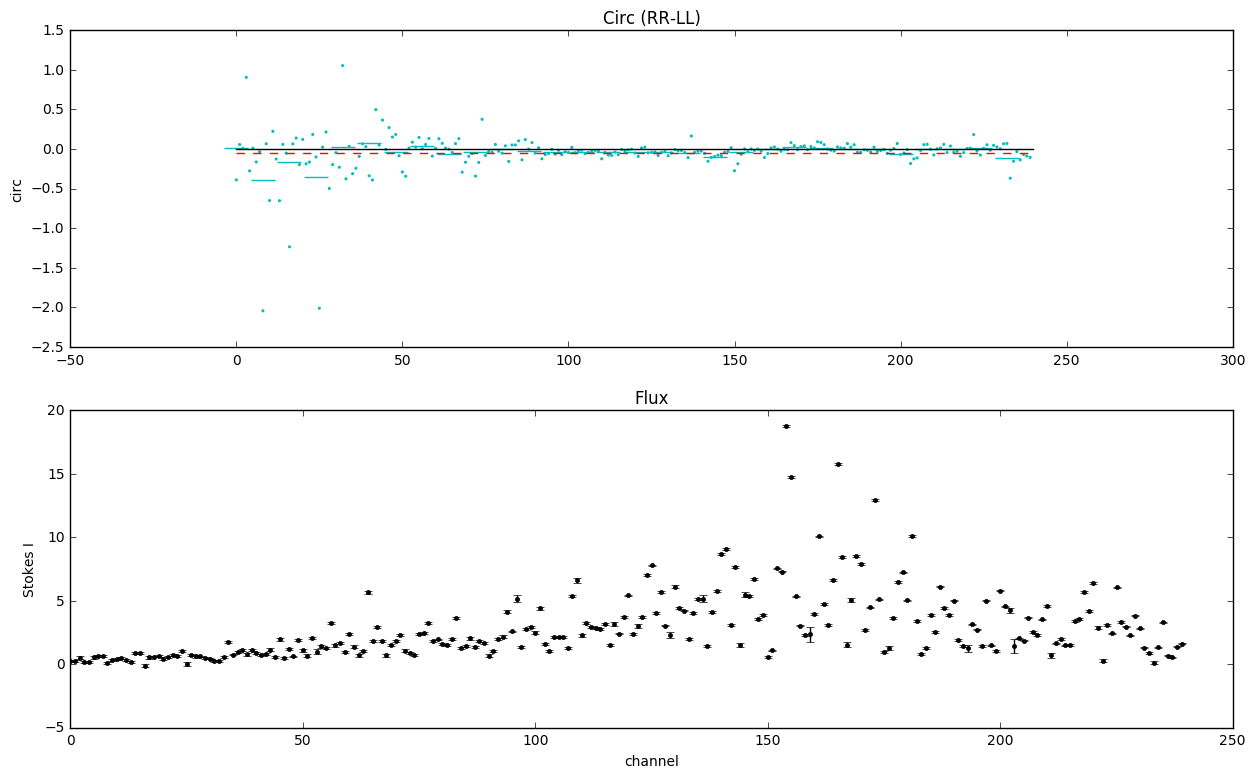

In [9]:
pl.figure(figsize=(15,9))
circ = (specRR - specLL)/(specRR + specLL)
pl.subplot(211)
pl.scatter(range(nch), circ, marker='.', c='c', edgecolors='none', s=20)
pl.scatter(range(0, nch, resamp), circ.reshape(nch/resamp, resamp).mean(axis=1), marker='_', c='c', s=300)
pl.plot([0,nch],[0,0], 'k')
pl.plot([0,nch],[circ.mean(), circ.mean()], 'r--')
pl.ylabel('circ')
t = pl.title('Circ (RR-LL)')
print('Circular fraction (RR-LL): {}'.format(circ.mean()))
offI = calflux*data.mean(axis=2).real[range(0,15)+range(16,30)]
noiseI = offI.std(axis=0)

pl.subplot(212)
stokesI = specRR + specLL
#pl.scatter(range(nch), stokesI, marker='.', c='k', edgecolors='none', s=20)
pl.errorbar(range(nch), stokesI, yerr=noiseI, fmt='k.', ecolor='k')
pl.xlabel('channel')
pl.ylabel('Stokes I')
t = pl.title('Flux')

## Source localization

In [7]:
ra_center, dec_center = st['radec']
def pixeltoarcsec(npix, uvres):
    """ pixel size in arcsec. note this differs from print statement during imaging (bug?) """

    return np.degrees(1./(npix*uvres))*3600  

In [9]:
# use astropy to manage coords
pc = coordinates.SkyCoord(ra=ra_center*units.rad, dec=dec_center*units.rad)
vla1_casa = coordinates.SkyCoord('5h32m8.385s', '+33d3m40.58s', frame='icrs') # imfit to B+BnC data (Robert)
vla2_casa = coordinates.SkyCoord('5h31m53.912s', '+33d10m20.08s', frame='icrs') # imfit to B+BnC data (Robert)
con_casa = coordinates.SkyCoord('5h31m58.694s', '+33d8m52.56s', frame='icrs') # imfit to B+BnC data (Robert)

## Fine pixels
### Get data for all events

In [52]:
loc,prop,st1 = rtpipe.parsecands.read_candidates('57623.72670021991/cands_16A-459_TEST_1hr.57623.72670021991_merge.pkl',
                                                returnstate=True)
snrs = prop[:, 0]
print(loc[snrs == max(snrs)], prop[snrs == max(snrs)])
candloc1 = loc[snrs == max(snrs)][0]

st1['filename'] = os.path.basename(st1['filename'])
st1['workdir'] = os.getcwd()
st1['bdfdir'] = ''
st1['uvres'] = 104
st1['npix'] = 4096 #5184
st1['npixx'] = 4096 #5184
st1['npixy'] = 4096 #5184
st1['scan'] = candloc1[0]  # needed due to bug in pipeline_reproduce
#st1['excludeants'] = [3]  # seems bad in telcal. try ignoring...

st1['starttime_mjd'] = st1['starttime_mjddict'][candloc1[0]]
segmenttimes = st1['segmenttimesdict'][candloc1[0]]
st1['segmenttimes'] = segmenttimes
st1['nsegments'] = len(segmenttimes)

data1 = rtpipe.RT.pipeline_reproduce(st1, candloc=candloc1, product='datacorr')
u1,v1,w1 = rtpipe.parsesdm.get_uvw_segment(st1, candloc1[1])

INFO:rtpipe.parsecands:Read 329 candidates from 57623.72670021991/cands_16A-459_TEST_1hr.57623.72670021991_merge.pkl.


[[  6 163  95   4   0   0]] [[  3.51678429e+01   1.14811218e-08  -3.84990986e-04   5.39926382e-04
    6.99490648e-02   2.11672894e+00   6.39713759e+00   2.27746439e-01
    1.84657721e+00]]


INFO:rtpipe.parsesdm:Reading scan 6, segment 163/216, times 17:51:23.446 to 17:51:24.738
INFO:rtpipe.parsesdm:Reading 258 ints starting at int 35929
INFO:rtpipe.parsesdm:Found online flags for 144 antenna/time ranges.
INFO:rtpipe.parsesdm:Applied online flags to 0 ints.
INFO:rtpipe.parsesdm:Calculating uvw at 2016/08/23/17:51:24.092 for scan 6 of source FRB121102-off
INFO:rtpipe.parsecal:Read telcalfile /home/mchammer/evladata/telcal/2016/08/16A-459_TEST_1hr.57623.72670021991.GN
INFO:rtpipe.parsecal:Solutions [ 272  380  704  812 1136 1244] flagged (times [ 57623.73016898  57623.73016898  57623.74748264  57623.74748264
  57623.76271875  57623.76271875], ants ['ea03' 'ea03' 'ea03' 'ea03' 'ea03' 'ea03'], freqs ['B-1' 'B-3' 'B-1' 'B-3' 'B-1' 'B-3']) for low gain amplitude.
INFO:rtpipe.parsecal:Frequency selection cut down to 1296 solutions
INFO:rtpipe.parsecal:Selection down to 432 solutions separated from given time by 4 minutes
INFO:rtpipe.parsecal:MJD: [ 57623.74748264]
INFO:rtpipe.par

In [5]:
loc,prop,st2 = rtpipe.parsecands.read_candidates('57633.66130137732/cands_16A-459_TEST_1hr_000.57633.66130137732_merge.pkl',
                                                 returnstate=True)
snrs = prop[:, 0]
print(loc[snrs == max(snrs)], prop[snrs == max(snrs)])
candloc2 = loc[snrs == max(snrs)][0]

st2['filename'] = os.path.basename(st2['filename'])
st2['workdir'] = os.getcwd()
st2['bdfdir'] = ''
st2['uvres'] = 104
st2['npix'] = 4096 #5184
st2['npixx'] = 4096 #5184
st2['npixy'] = 4096 #5184
st2['flaglist']=[('badap', 3.0, 0.2)]  # prevent overflagging of bright pulse!
st2['scan'] = candloc2[0]  # needed due to bug in pipeline_reproduce

st2['starttime_mjd'] = st2['starttime_mjddict'][candloc2[0]]
segmenttimes = st2['segmenttimesdict'][candloc2[0]]
st2['segmenttimes'] = segmenttimes
st2['nsegments'] = len(segmenttimes)

data2 = rtpipe.RT.pipeline_reproduce(st2, candloc=candloc2, product='datacorr')
u2,v2,w2 = rtpipe.parsesdm.get_uvw_segment(st2, candloc2[1])

2016-10-28 16:38:24,531 - rtpipe.parsecands - INFO - Read 2889 candidates from 57633.66130137732/cands_16A-459_TEST_1hr_000.57633.66130137732_merge.pkl.


[[ 7 43 36  2  0  0]] [[  8.63080139e+01   4.73778279e-08  -3.84990986e-04   5.39926382e-04
    1.38285152e-01   7.20280177e-01  -2.91199491e-01   2.03324872e+00
    4.30538854e+01]]


2016-10-28 16:38:25,309 - rtpipe.parsesdm - INFO - Reading scan 7, segment 43/216, times 16:19:00.041 to 16:19:01.333
2016-10-28 16:38:25,417 - rtpipe.parsesdm - INFO - Reading 258 ints starting at int 9478
2016-10-28 16:38:28,588 - rtpipe.parsesdm - INFO - Found online flags for 186 antenna/time ranges.
2016-10-28 16:38:28,597 - rtpipe.parsesdm - INFO - Applied online flags to 0 ints.
2016-10-28 16:38:29,917 - rtpipe.parsesdm - INFO - Calculating uvw at 2016/09/02/16:19:00.687 for scan 7 of source FRB121102-off
2016-10-28 16:38:30,073 - rtpipe.parsecal - INFO - Read telcalfile /home/mchammer/evladata/telcal/2016/09/16A-459_TEST_1hr_000.57633.66130137732.GN
2016-10-28 16:38:30,101 - rtpipe.parsecal - INFO - Frequency selection cut down to 1296 solutions
2016-10-28 16:38:30,104 - rtpipe.parsecal - INFO - Selection down to 432 solutions separated from given time by 3 minutes
2016-10-28 16:38:30,111 - rtpipe.parsecal - INFO - MJD: [ 57633.68208333]
2016-10-28 16:38:30,114 - rtpipe.parseca

In [14]:
loc,prop,st3 = rtpipe.parsecands.read_candidates('57633.66130137732/cands_16A-459_TEST_1hr_000.57633.66130137732_merge.pkl',
                                                 returnstate=True)
snrs = prop[:, 0]
print(loc[snrs == max(snrs)], prop[snrs == max(snrs)])
#candloc3 = loc[snrs == max(snrs)][0]
candloc3 = [ 13, 47, 185, 1, 0, 0]

st3['filename'] = os.path.basename(st3['filename'])
st3['workdir'] = os.getcwd()
st3['bdfdir'] = ''
st3['uvres'] = 104
st3['npix'] = 4096 #5184
st3['npixx'] = 4096 #5184
st3['npixy'] = 4096 #5184
st3['flaglist'] = [('badap', 3.0, 0.2)]
st3['scan'] = candloc3[0]  # needed due to bug in pipeline_reproduce

st3['starttime_mjd'] = st3['starttime_mjddict'][candloc3[0]]
segmenttimes = st3['segmenttimesdict'][candloc3[0]]
st3['segmenttimes'] = segmenttimes
st3['nsegments'] = len(segmenttimes)

data3 = rtpipe.RT.pipeline_reproduce(st3, candloc=candloc3, product='datacorr')
u3,v3,w3 = rtpipe.parsesdm.get_uvw_segment(st3, candloc3[1])

2016-09-14 15:15:26,079 - rtpipe.parsecands - INFO - Read 2889 candidates from 57633.66130137732/cands_16A-459_TEST_1hr_000.57633.66130137732_merge.pkl.


[[ 7 43 36  2  0  0]] [[  8.63080139e+01   4.73778279e-08  -3.84990986e-04   5.39926382e-04
    1.38285152e-01   7.20280177e-01  -2.91199491e-01   2.03324872e+00
    4.30538854e+01]]


2016-09-14 15:15:26,416 - rtpipe.parsesdm - INFO - Reading scan 13, segment 47/216, times 16:41:00.850 to 16:41:02.142
2016-09-14 15:15:26,524 - rtpipe.parsesdm - INFO - Reading 258 ints starting at int 10360
2016-09-14 15:15:27,801 - rtpipe.parsesdm - INFO - Found online flags for 186 antenna/time ranges.
2016-09-14 15:15:27,808 - rtpipe.parsesdm - INFO - Applied online flags to 0 ints.
2016-09-14 15:15:28,700 - rtpipe.parsesdm - INFO - Calculating uvw at 2016/09/02/16:41:01.496 for scan 13 of source FRB121102-off
2016-09-14 15:15:28,833 - rtpipe.parsecal - INFO - Read telcalfile /home/mchammer/evladata/telcal/2016/09/16A-459_TEST_1hr_000.57633.66130137732.GN
2016-09-14 15:15:28,847 - rtpipe.parsecal - INFO - Frequency selection cut down to 1296 solutions
2016-09-14 15:15:28,849 - rtpipe.parsecal - INFO - Selection down to 432 solutions separated from given time by 3 minutes
2016-09-14 15:15:28,853 - rtpipe.parsecal - INFO - MJD: [ 57633.69731944]
2016-09-14 15:15:28,854 - rtpipe.pars

In [42]:
loc,prop,st4 = rtpipe.parsecands.read_candidates('57638.42695471065/cands_16A-496_sb32698778_1_02h00m.57638.42695471065_merge.pkl',
                                                 returnstate=True)
snrs = prop[:, 0]
print(loc[snrs == max(snrs)], prop[snrs == max(snrs)])
candloc4 = loc[snrs == max(snrs)][0]

st4['filename'] = os.path.basename(st4['filename'])
st4['workdir'] = os.getcwd()
st4['bdfdir'] = ''
st4['uvres'] = 104
st4['npix'] = 5184 # 4096
st4['npixx'] = 5184 # 4096
st4['npixy'] = 5184 # 4096
st4['scan'] = candloc4[0]  # needed due to bug in pipeline_reproduce

st4['starttime_mjd'] = st4['starttime_mjddict'][candloc4[0]]
segmenttimes = st4['segmenttimesdict'][candloc4[0]]
st4['segmenttimes'] = segmenttimes
st4['nsegments'] = len(segmenttimes)

data4 = rtpipe.RT.pipeline_reproduce(st4, candloc=candloc4, product='datacorr')
u4,v4,w4 = rtpipe.parsesdm.get_uvw_segment(st4, candloc4[1])

INFO:rtpipe.parsecands:Read 6324 candidates from 57638.42695471065/cands_16A-496_sb32698778_1_02h00m.57638.42695471065_merge.pkl.


[[ 29  83 182   4   0   0]] [[  9.91339684e+00   3.36714767e-09  -3.84990986e-04   5.39926382e-04
    2.23830030e-02   4.27747682e-01   1.55957789e-01   2.04272865e-03
    9.67072298e-03]]


INFO:rtpipe.parsesdm:Reading scan 29, segment 83/200, times 11:59:05.034 to 11:59:06.340
INFO:rtpipe.parsesdm:Reading 261 ints starting at int 18516
INFO:rtpipe.parsesdm:Found online flags for 351 antenna/time ranges.
INFO:rtpipe.parsesdm:Applied online flags to 0 ints.
INFO:rtpipe.parsesdm:Calculating uvw at 2016/09/07/11:59:05.687 for scan 29 of source FRB121102-off
INFO:rtpipe.parsecal:Read telcalfile /home/mchammer/evladata/telcal/2016/09/16A-496_sb32698778_1_02h00m.57638.42695471065.GN
INFO:rtpipe.parsecal:Frequency selection cut down to 2912 solutions
INFO:rtpipe.parsecal:Selection down to 416 solutions separated from given time by 7 minutes
INFO:rtpipe.parsecal:MJD: [ 57638.49431019]
INFO:rtpipe.parsecal:Source: ['J0555+3948']
INFO:rtpipe.parsecal:Solutions for 8 spw: ([ 2553.  2681.  2809.  2937.  3065.  3193.  3321.  3449.])
INFO:rtpipe.parsecal:Applying gain solution for chans from 0-29
INFO:rtpipe.parsecal:Applying gain solution for chans from 30-59
INFO:rtpipe.parsecal:Appl

In [16]:
# plus one more for each pulse...

In [6]:
def imloc(st, data, u, v, w, i, verbose=0, weight='uniform'):
    if weight == 'uniform':
        weightarr = np.ones_like(data)
    elif weight == 'uvdist':
        uvd = np.sqrt(u**2+v**2)
        weightarr = np.ones_like(data)
        for bl in range(st['nbl']):
            weightarr[:,bl] *= uvd[bl]/uvd.max()
    im = rtpipe.RT.sample_image(st, data*weightarr, u, v, w, i=i)
    l,m = rtpipe.RT.calc_lm(st, im)
    ra, dec = rtpipe.reproduce.source_location(ra_center, dec_center, l, m)
    ras = ra.split()
    decs = dec.split()
    loc = coordinates.SkyCoord('{0}h{1}m{2}s'.format(ras[0], ras[1], ras[2]),
                               '{0}d{1}m{2}s'.format(decs[0], decs[1], decs[2]), frame='icrs')

    if verbose:
        print('Peak location:')
        print(loc.ra.hms, loc.dec.dms)
    return im, loc

In [65]:
im1, frb1 = imloc(st1, data1, u1, v1, w1, candloc1[2], weight='uvdist')
l1, m1 = rtpipe.RT.calc_lm(st1, im1)
print(im1.max()/im1.std(), np.where(im1 == im1.max()), l1, m1)

im2, frb2 = imloc(st2, data2, u2, v2, w2, candloc2[2], weight='uvdist')
l2, m2 = rtpipe.RT.calc_lm(st2, im2)
print(im2.max()/im2.std(), np.where(im2 == im2.max()), l2, m2)

im3, frb3 = imloc(st3, data3, u3, v3, w3, candloc3[2], weight='uvdist')
l3, m3 = rtpipe.RT.calc_lm(st3, im3)
print(im3.max()/im3.std(), np.where(im3 == im3.max()), l3, m3)

im4, frb4 = imloc(st4, data4, u4, v4, w4, candloc4[2], weight='uvdist')
l4, m4 = rtpipe.RT.calc_lm(st4, im4)
print(im4.max()/im4.std(), np.where(im4 == im4.max()), l4, m4)

30.7756182879 (array([2211]), array([1818])) -0.000382643479567 0.000539926382212
140.931476021 (array([2211]), array([1818])) -0.000382643479567 0.000539926382212
12.8631544815 (array([2211]), array([1818])) -0.000382643479567 0.000539926382212
9.16246699302 (array([2799]), array([2300])) -0.000383947649573 0.000541607312441


## Fit beam and source

In [68]:
def makeandfitbeam(st, data, chans, u, v, window=50, sigx=5, sigy=5, weight='uniform'):
    """ Make beam for channel range """
    
    def twoD_beam((x, y), sigma_x, sigma_y, theta):
        xo = x[len(x)/2, len(x)/2]
        yo = y[len(y)/2, len(y)/2]
        amplitude = 1.
        a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
        b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
        c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
        g = amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                                 + c*((y-yo)**2)))
        return g.ravel()

    if weight == 'uniform':
        weightarr = np.ones_like(data[0])
    elif weight == 'uvdist':
        uvd = np.sqrt(u**2+v**2)
        weightarr = np.ones_like(data[0])
        for bl in range(st['nbl']):
            weightarr[bl] *= uvd[bl]/uvd.max()

    freqarr = st['freq'][chans]/st['freq_orig'][0]
    beam = rtlib.beamonefullxy(np.outer(u, freqarr), np.outer(v, freqarr), 
                               (weightarr*data[0]).take(chans, axis=1), 
                               st['npixx'], st['npixy'], st['uvres'])
    
    x = np.linspace(0, window-1, window)
    y = np.linspace(0, window-1, window)
    x, y = np.meshgrid(x, y)

    ypix, xpix = np.where(beam == beam.max())
    beamc = beam[ypix-window/2:ypix+window/2, xpix-window/2:xpix+window/2].transpose()
                           
    init = (sigx, sigy, 0.)
    popt, pcov = curve_fit(twoD_beam, (x,y), beamc.ravel(), p0=init)
    i = 0
    for par in zip(popt, np.sqrt(np.diag(pcov))):
        print('par{0}: {1} +- {2}'.format(i, *par))
        i += 1
    
    pl.figure(figsize=(16,8))
    pl.subplot(121)
    pl.imshow(beamc, interpolation='nearest')
    pl.colorbar()
    pl.contour(x, y, twoD_beam((x,y), *popt).reshape(window,window))
    pl.subplot(122)
    pl.imshow(beamc - twoD_beam((x,y), *popt).reshape(window,window), 
              interpolation='nearest')
    pl.colorbar()

    beamx = 2.3548 * popt[0] * pixeltoarcsec(st2['npixx'], st2['uvres'])
    beamy = 2.3548 * popt[1] * pixeltoarcsec(st2['npixy'], st2['uvres'])
    print('Arcsec width: ({0}, {1})'.format(beamx, beamy))
    return popt

Gridded 1.000 of data. Scaling fft by = 103.4
Pixel sizes (1.0", 1.0"), Field size 1983.3"
par0: 3.0218539378 +- 0.0440311830027
par1: 2.35731134198 +- 0.0343487656143
par2: -0.341884555488 +- 0.0474186888887
Arcsec width: (3.44555623001, 2.68783632419)
Gridded 1.000 of data. Scaling fft by = 106.5
Pixel sizes (1.0", 1.0"), Field size 1983.3"
par0: 2.5865455212 +- 0.0418463269862
par1: 2.28770391792 +- 0.0370106150461
par2: -0.371228678211 +- 0.107296981791
Arcsec width: (2.94921204605, 2.60846905543)
Gridded 1.000 of data. Scaling fft by = 103.4
Pixel sizes (1.0", 1.0"), Field size 1983.3"
par0: 2.73132632856 +- 0.0410375731303
par1: 2.30382496641 +- 0.0346138916129
par2: -0.196764780536 +- 0.071715096139
Arcsec width: (3.11429296096, 2.62685047962)
Gridded 1.000 of data. Scaling fft by = 190.4
Pixel sizes (0.8", 0.8"), Field size 1983.3"
par0: 2.32480659002 +- 0.0319497648933
par1: 3.43936516978 +- 0.047267068125
par2: 0.155608072274 +- 0.0279308618946
Arcsec width: (2.65077399328, 3

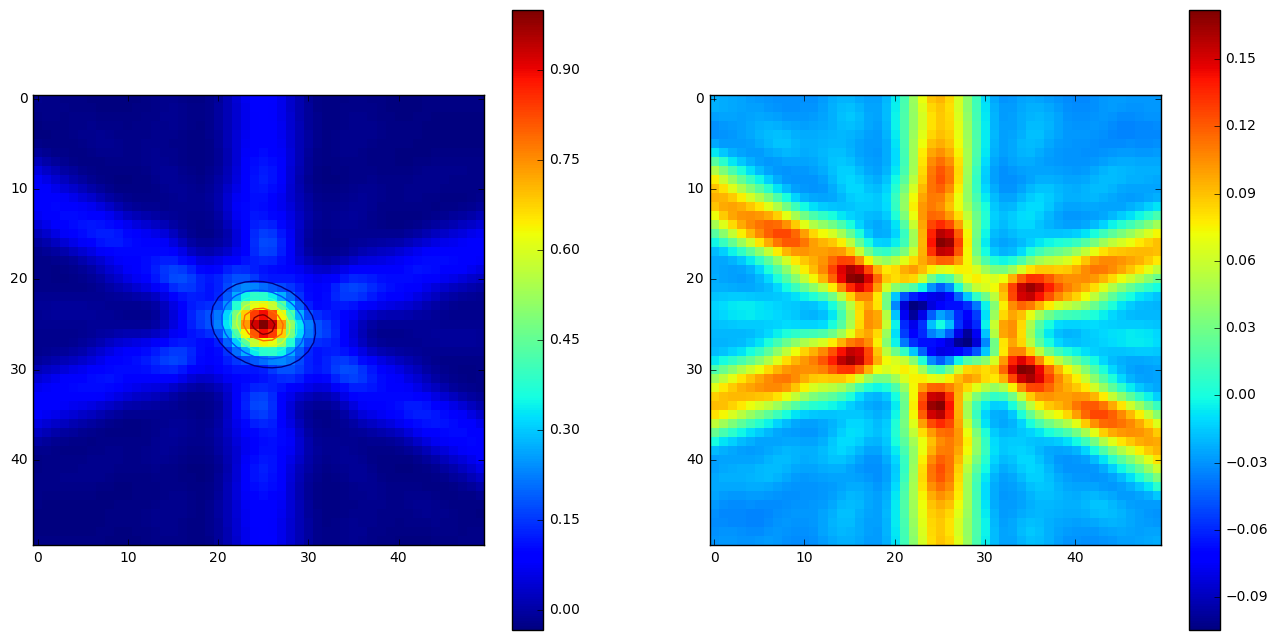

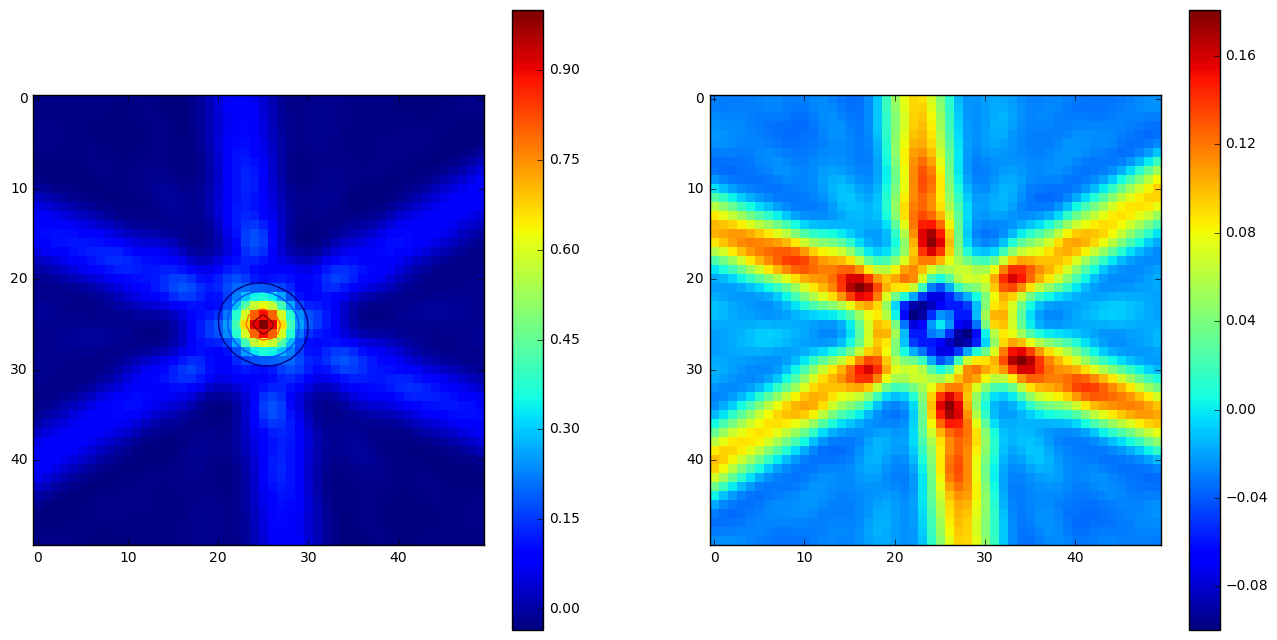

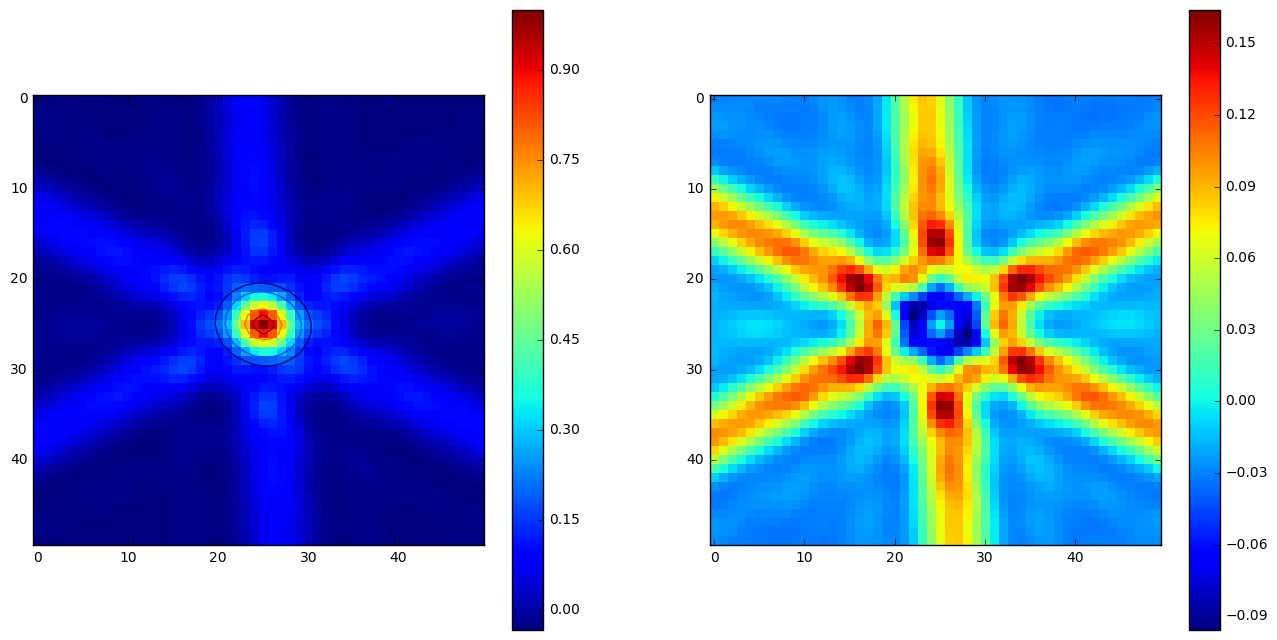

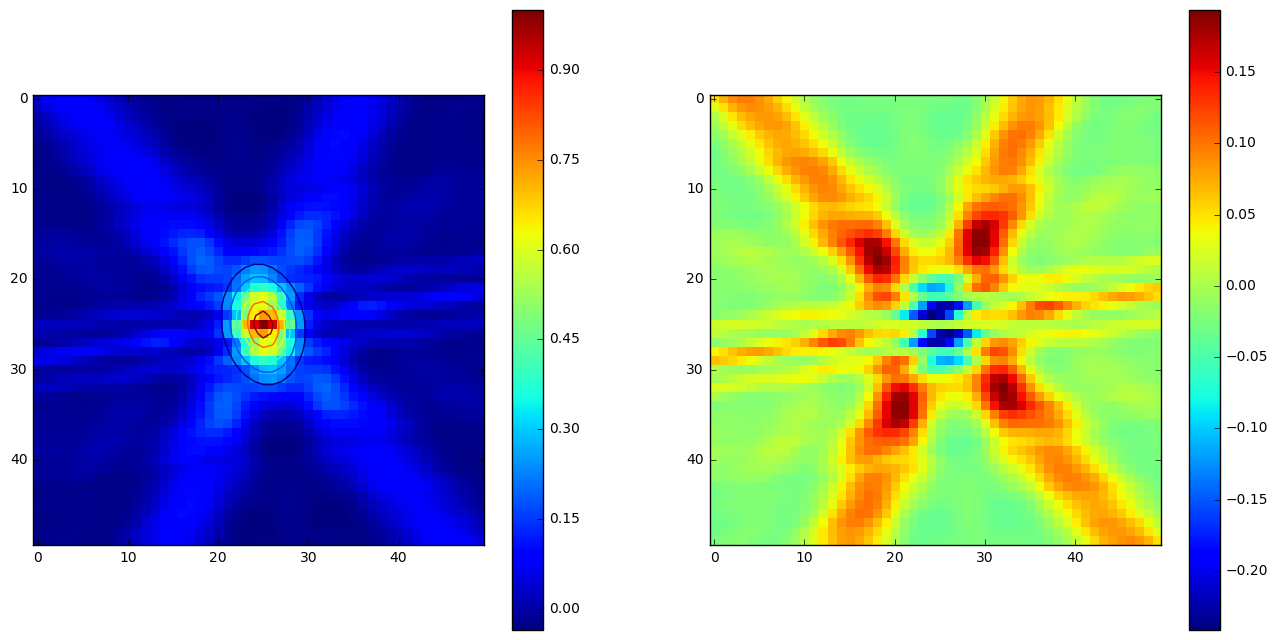

In [70]:
popt1 = makeandfitbeam(st1, data1, np.arange(st1['nchan']), u1, v1, weight='uvdist')
popt2 = makeandfitbeam(st2, data2, np.arange(st2['nchan']), u2, v2, weight='uvdist')
popt3 = makeandfitbeam(st3, data3, np.arange(st3['nchan']), u3, v3, weight='uvdist')
popt4 = makeandfitbeam(st4, data4, np.arange(st4['nchan']), u4, v4, weight='uvdist')

In [22]:
def imfit(im, st, beampars, pix=[], window=50, a=0.5, verbose=0):

    sigma_x, sigma_y, theta = beampars
    def twoD_Gaussian((x, y), amplitude, xo, yo):
        # with beam params fixed, define model to find centroid of source
        xo = float(xo)
        yo = float(yo)    
        a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
        b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
        c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
        g = amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                                + c*((y-yo)**2)))
        return g.ravel()

    if not(len(pix)):
        ypix, xpix = np.where(im == im.max())
        print('Getting subim from max pixel at {0},{1}'.format(ypix, xpix))
    else:
        ypix, xpix = pix
        print('Using provided max pixel at {0},{1}'.format(ypix, xpix))
        
    subim = im[ypix[0]-window/2:ypix[0]+window/2, xpix[0]-window/2:xpix[0]+window/2].transpose()

    x = np.linspace(0, window-1, window)
    y = np.linspace(0, window-1, window)
    x, y = np.meshgrid(x, y)

    init = (a, window/2, window/2)
    popt, pcov = curve_fit(twoD_Gaussian, (x,y), subim.ravel(), p0=init)
    if verbose:
        i = 0
        for par in zip(popt, np.sqrt(np.diag(pcov))):
            print('par{0}: {1} +- {2}'.format(i, *par))
            i += 1
      
    pl.figure(figsize=(16,8))
    pl.subplot(121)
    pl.imshow(subim, interpolation='nearest')
    pl.colorbar()
    pl.contour(x, y, twoD_Gaussian((x,y), *popt).reshape(window,window))
    pl.subplot(122)
    pl.imshow(subim - twoD_Gaussian((x,y), *popt).reshape(window,window), 
              interpolation='nearest')
    pl.colorbar()

    l, m = rtpipe.RT.calc_lm(st, pix=(ypix[0]-window/2+popt[1], xpix[0]-window/2+popt[2]))
    if verbose:
        print('l,m = {0},{1}'.format(l,m))
    ra, dec = rtpipe.reproduce.source_location(ra_center, dec_center, l, m)
    ras = ra.split()
    decs = dec.split()
    fit = coordinates.SkyCoord('{0}h{1}m{2}s'.format(ras[0], ras[1], ras[2]),
                               '{0}d{1}m{2}s'.format(decs[0], decs[1], decs[2]), frame='icrs')

    e_a, e_x, e_y = np.sqrt(np.diag(pcov))
    if verbose:
        print(fit.ra.hms, fit.dec.dms)
        print('Centroid error in arcsec: {0}, {1}'.format(e_x * pixeltoarcsec(st['npixx'], st['uvres']),
                                                          e_y * pixeltoarcsec(st['npixy'], st['uvres'])))

    return fit, e_x*pixeltoarcsec(st['npixx'], st['uvres']), e_y*pixeltoarcsec(st['npixx'], st['uvres'])

Getting subim from max pixel at [2211],[1818]
par0: 0.0100173823062 +- 0.000298676050926
par1: 25.5664966751 +- 0.124584307
par2: 24.9624115469 +- 0.102928940956
l,m = -0.000383973333916,0.000540014621331
hms_tuple(h=5.0, m=31.0, s=58.69593780480443) dms_tuple(d=33.0, m=8.0, s=52.386020397592574)
Centroid error in arcsec: 0.0603247022066, 0.0498390034917
Getting subim from max pixel at [2211],[1818]
par0: 0.0751029772161 +- 0.00178002903011
par1: 25.4578488592 +- 0.0854461634533
par2: 24.569692759 +- 0.0780720879143
l,m = -0.000383718282516,0.000540936531046
hms_tuple(h=5.0, m=31.0, s=58.70012523059934) dms_tuple(d=33.0, m=8.0, s=52.576177926304695)
Centroid error in arcsec: 0.0413737049966, 0.0378031195701
Getting subim from max pixel at [2211],[1818]
par0: 0.00485879211899 +- 0.000141275388939
par1: 25.2700818167 +- 0.111691171678
par2: 24.5301176179 +- 0.0954646658868
l,m = -0.000383277498255,0.000541029433927
hms_tuple(h=5.0, m=31.0, s=58.707362012499473) dms_tuple(d=33.0, m=8.0, s

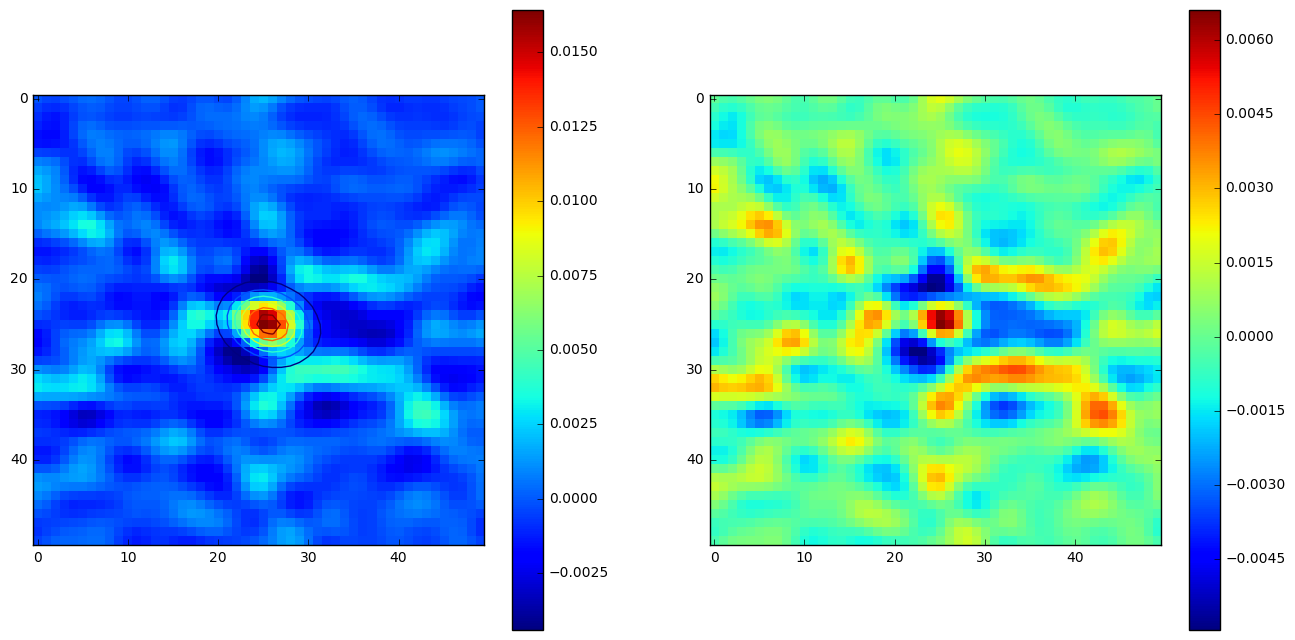

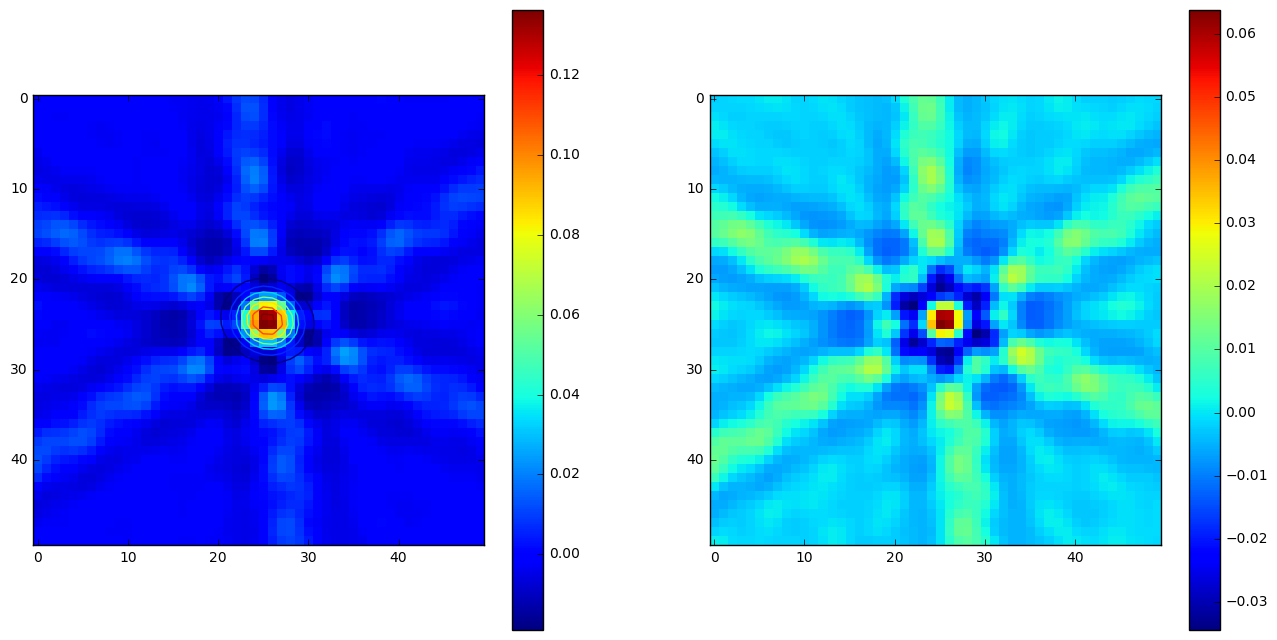

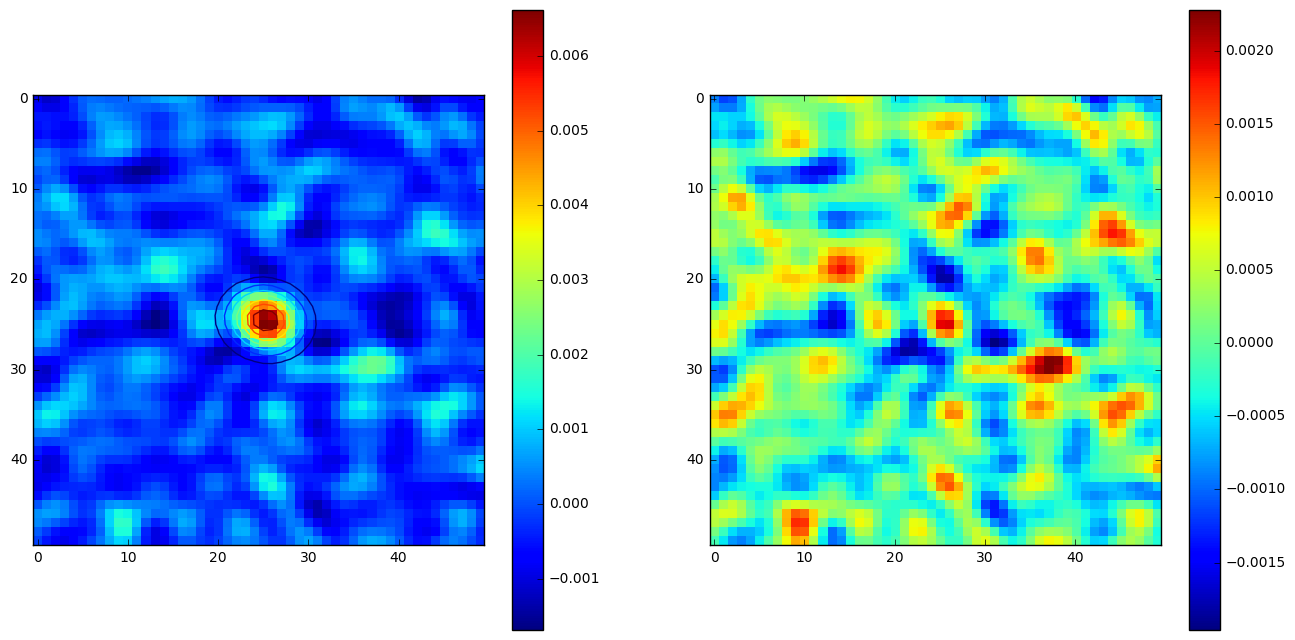

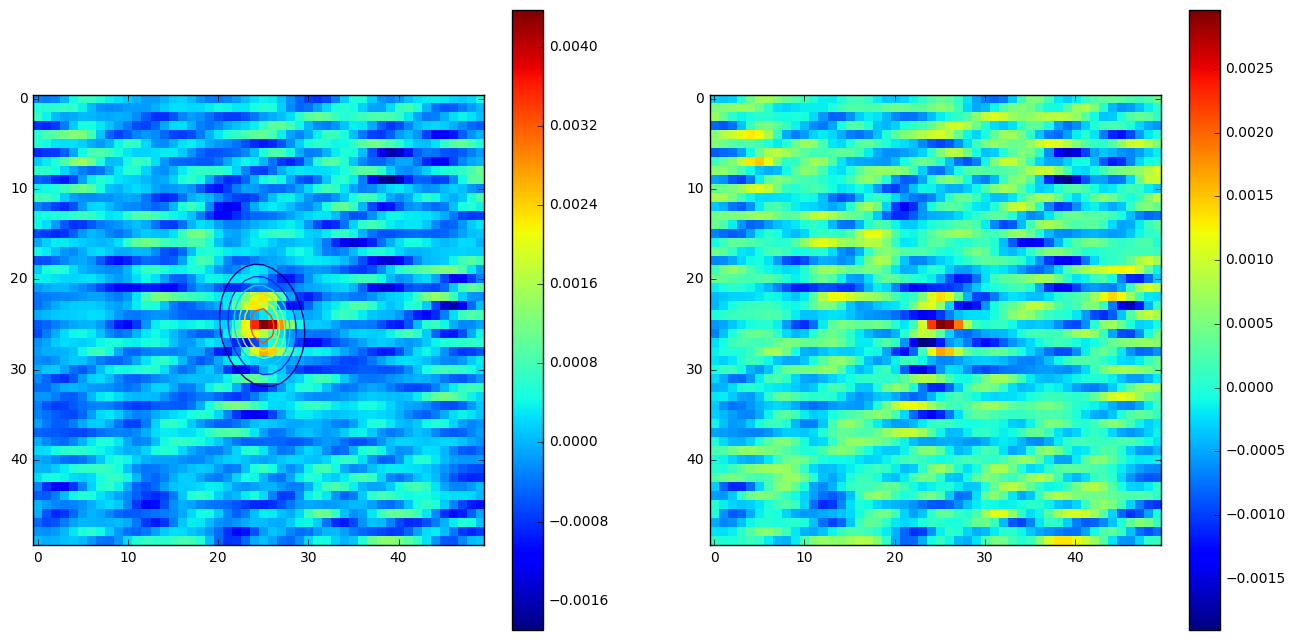

In [71]:
fit_frb1, fit_ex1, fit_ey1 = imfit(im1, st1, popt1, verbose=1)
fit_frb2, fit_ex2, fit_ey2 = imfit(im2, st2, popt2, verbose=1)
fit_frb3, fit_ex3, fit_ey3 = imfit(im3, st3, popt3, verbose=1)
fit_frb4, fit_ex4, fit_ey4 = imfit(im4, st4, popt4, verbose=1)

In [72]:
print('Model offset from constant src (from CASA): {0}"'.format(fit_frb1.separation(con_casa).arcsec))
print('Model offset from constant src (from CASA): {0}"'.format(fit_frb2.separation(con_casa).arcsec))
print('Model offset from constant src (from CASA): {0}"'.format(fit_frb3.separation(con_casa).arcsec))
print('Model offset from constant src (from CASA): {0}"'.format(fit_frb4.separation(con_casa).arcsec))

Model offset from constant src (from CASA): 0.175673502216"
Model offset from constant src (from CASA): 0.0786090382248"
Model offset from constant src (from CASA): 0.171493385924"
Model offset from constant src (from CASA): 0.138772249873"


## Location of CASA sources

In [39]:
# reduce logging to keep rtpipe from slowing down notebook

#import logging_tree
#logging_tree.printout()

import logging
logger = logging.getLogger()
for hdlr in logger.handlers:
    logger.removeHandler(hdlr)

# to restore logging
#logging.basicConfig()

In [26]:
nsegments = 900 # should be ~900 for 4096x4096 images
read_tdownsample = 53 # for nsegments=900
scans = rtpipe.parsesdm.read_scans('16A-459_TEST_1hr_000.57633.66130137732')
targetscans = [sc for sc in scans if 'TARGET' in scans[sc]['intent']]
print(targetscans)
st2['nsegments'] = nsegments
st2['savenoise'] = False
st2['savecands'] = False
st2['dmarr'] = [0]
st2['dtarr'] = [1]
st2['logfile'] = False
st2['read_tdownsample'] = read_tdownsample
st2['timesub'] = ''

[3, 4, 5, 6, 7, 9, 10, 11, 12, 13]


In [27]:
for sc in targetscans:
    imout = 'imc_57633_sc{0}.pkl'.format(sc)
    if not os.path.exists(imout):
        st2 = rtpipe.RT.set_pipeline('16A-459_TEST_1hr_000.57633.66130137732', sc, paramfile='rtpipe_cbe.conf',
                                     nsegments=nsegments, savenoise=False, savecands=False, dmarr=[0], dtarr=[1],
                                     logfile=False, uvres=104, npix=4096, read_tdownsample=read_tdownsample, timesub='')

        imc = np.zeros(shape=(st2['npixx'], st2['npixy']))
        segs = range(nsegments)
        print ('scan {0}:'.format(sc), end=' ')
        for seg in segs:
            print(seg, end=' ')
            datac = np.ma.masked_equal(rtpipe.RT.pipeline_reproduce(st2, segment=seg, product='data'), 0j)
            uc, vc, wc = rtpipe.parsesdm.get_uvw_segment(st2, seg)

            # peeling
            peeled = []
            for _ in range(4):
                im1 = rtpipe.RT.sample_image(st2, datac, uc, vc, wc, i=0)
                l,m = rtpipe.RT.calc_lm(st2, im1)
                rtlib.phaseshift_threaded(datac, st2, l, m, uc, vc)
                datac = datac - datac.mean()
                rtlib.phaseshift_threaded(datac, st2, -l, -m, uc, vc)
                peeled.append( (l,m) )

        # build summed image
            imc += rtpipe.RT.sample_image(st2, datac, uc, vc, wc, i=0)*calflux

        # normalize
        imc /= nsegments

        with open(imout, 'w') as pkl:
            pickle.dump(imc, pkl, protocol=2)
    else:
        print('{0} exists. Skipping'.format(imout))

imc_57633_sc3.pkl exists. Skipping
imc_57633_sc4.pkl exists. Skipping
imc_57633_sc5.pkl exists. Skipping
imc_57633_sc6.pkl exists. Skipping
imc_57633_sc7.pkl exists. Skipping
imc_57633_sc9.pkl exists. Skipping
imc_57633_sc10.pkl exists. Skipping
imc_57633_sc11.pkl exists. Skipping
imc_57633_sc12.pkl exists. Skipping
imc_57633_sc13.pkl exists. Skipping


In [28]:
# sum written images
imc = np.zeros(shape=(st2['npixx'], st2['npixy']))
for sc in targetscans:
    imin = 'imc_57633_sc{0}.pkl'.format(sc)
    with open(imin, 'r') as pkl:
        imc += pickle.load(pkl)

imc /= len(targetscans)

119.745581882 (array([2211]), array([1818]))
81.7413567464 (array([1782]), array([3310]))
1.4681505204e-05


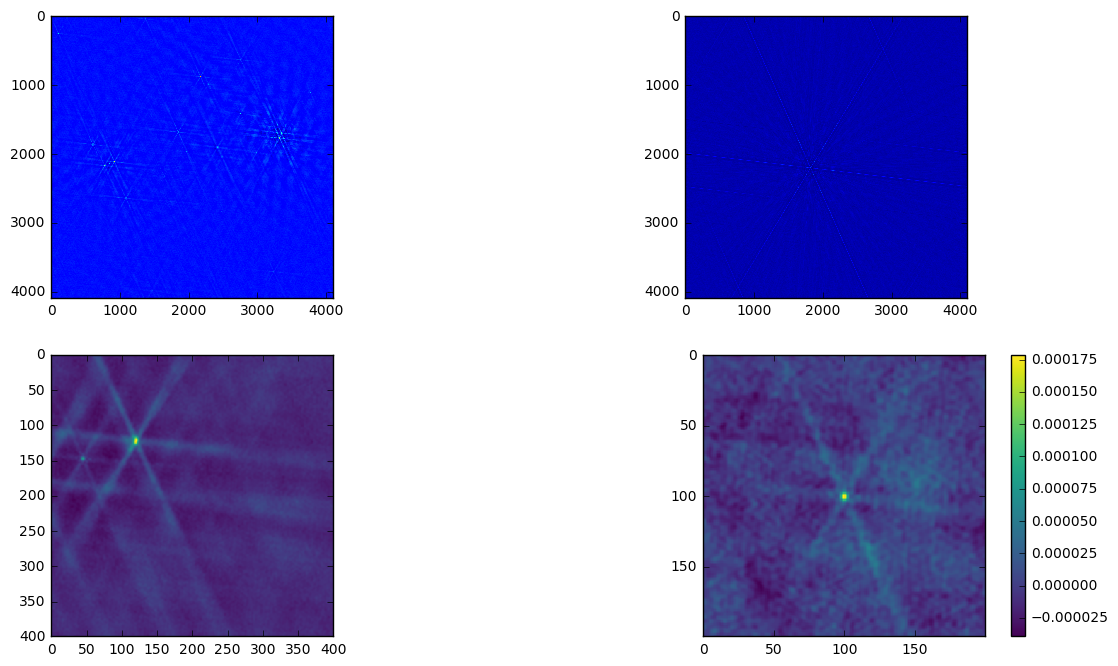

In [29]:
print(im2.max()/im2.std(), np.where(im2 == im2.max()))
print(imc.max()/imc.std(), np.where(imc == imc.max()))
print(imc.std())

pl.figure(figsize=(15,8))
pl.subplot(221)
pl.imshow(imc, interpolation='nearest', vmax=0.001)
pl.subplot(222)
pl.imshow(im2, interpolation='nearest')
pl.subplot(223)
pl.imshow(imc[2000:2400,800:1200], interpolation='nearest', cmap='viridis')
pl.subplot(224)
pl.imshow(imc[2111:2311,1718:1918], interpolation='nearest', cmap='viridis')
pl.colorbar()

Using provided max pixel at [2211],[1818]


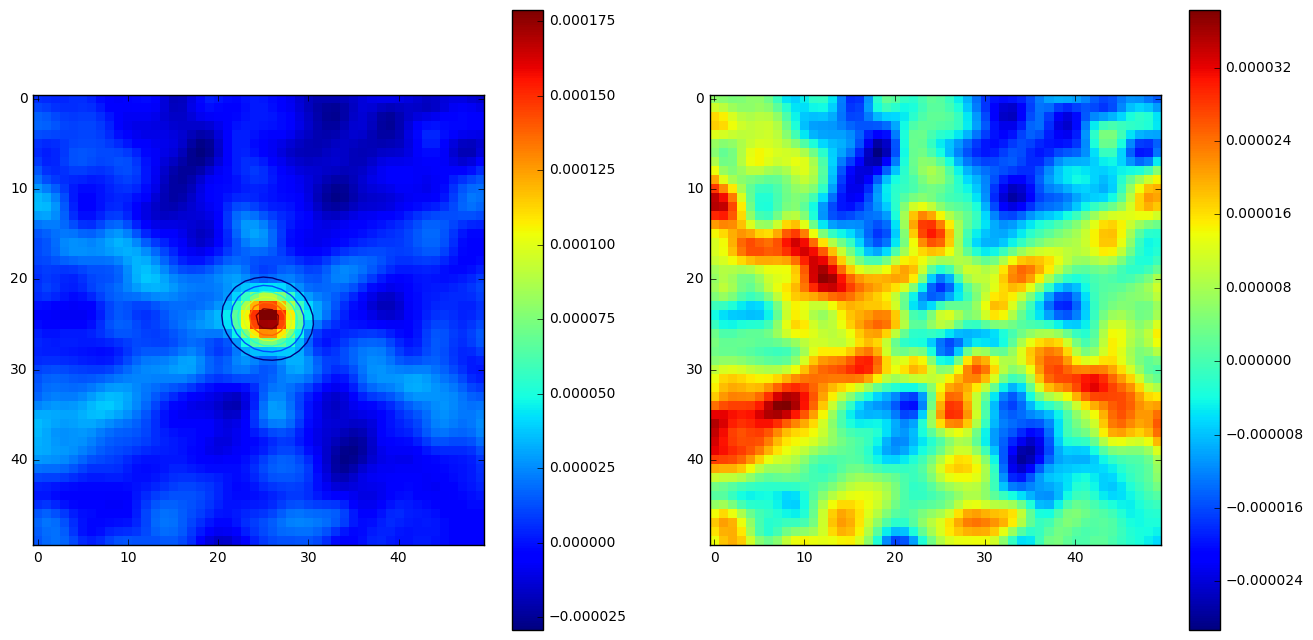

In [30]:
fit_con, fitcon_ex, fitcon_ey = imfit(imc, st2, popt2, pix=np.where(im2 == im2.max()))

(-0.050000000000000003,
 0.25000000000000006,
 -0.30000000000000004,
 0.30000000000000004)

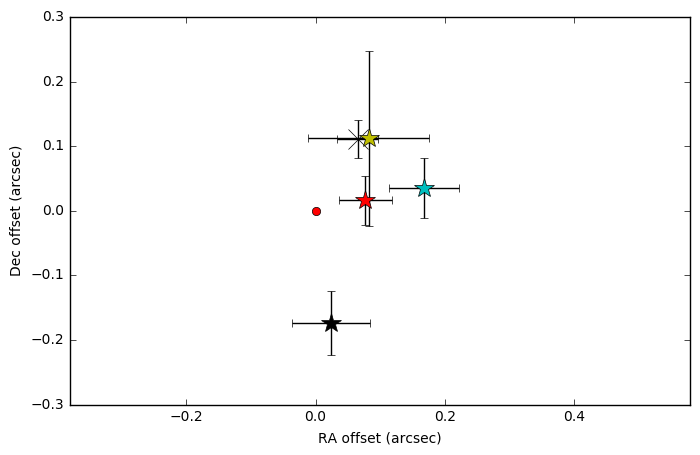

In [74]:
pl.figure(figsize=(8,5))

rrc, ddc = con_casa.spherical_offsets_to(fit_con)
rrf1, ddf1 = con_casa.spherical_offsets_to(fit_frb1)
rrf2, ddf2 = con_casa.spherical_offsets_to(fit_frb2)
rrf3, ddf3 = con_casa.spherical_offsets_to(fit_frb3)
rrf4, ddf4 = con_casa.spherical_offsets_to(fit_frb4)
pl.errorbar(rrc.arcsec, ddc.arcsec, xerr=fitcon_ex, yerr=fitcon_ey, fmt='kx', ecolor='k', ms=15)
pl.errorbar(rrf1.arcsec, ddf1.arcsec, xerr=fit_ex1, yerr=fit_ey1, fmt='k*', ecolor='k', ms=15)
pl.errorbar(rrf2.arcsec, ddf2.arcsec, xerr=fit_ex2, yerr=fit_ey2, fmt='r*', ecolor='k', ms=15)
pl.errorbar(rrf3.arcsec, ddf3.arcsec, xerr=fit_ex3, yerr=fit_ey3, fmt='c*', ecolor='k', ms=15)
pl.errorbar(rrf4.arcsec, ddf4.arcsec, xerr=fit_ex4, yerr=fit_ey4, fmt='y*', ecolor='k', ms=15)
pl.plot(0, 0, 'ro')
pl.xlabel('RA offset (arcsec)')
pl.ylabel('Dec offset (arcsec)')
pl.axis('equal')

## Jackknifing

In [33]:
# jackknife by removing antennas

fits_jk = {}
st2['excludeants'] = []
blsref = [list(bl) for bl in rtlib.calc_blarr(st)]
chunk = 3
for ex in zip(*[iter(st2['ants'])]*chunk):
    st2['excludeants'] = ex
    bls = [list(bl) for bl in rtlib.calc_blarr(st)]
    blinds = [blsref.index(bl) for bl in bls]
    print('excluding ants {}. using {} bls'.format(ex, len(blinds)))

    im, ploc = imloc(st2, data.take(blinds, axis=1), u[blinds], v[blinds], w[blinds], i=36)
    loc = imfit(im, st)
    fits_jk[ex] = loc

st2['excludeants'] = []

excluding ants (1, 2, 3). using 351 bls


IndexError: index 240 is out of bounds for size 240

In [ ]:
# jackknife by imaging pols separately
sh = data2.shape
datap = np.zeros(shape=(sh[0], sh[1], sh[2], 1), dtype='complex64')

for pol in [0,1]:
#    print(datap.mean())
    datap[...,0] = data2[...,pol].copy()
#    print(datap.mean())
    im, ploc = imloc(st2, datap, u, v, w, i=36)
    loc = imfit(im, st2)
    fits_jk['pol{0}'.format(pol)] = loc

In [ ]:
pl.figure(figsize=(8,5))

for ii in fits_jk.keys():
    fit, ex, ey = fits_jk[ii]
    print('Separation of {0} from cont src: {1} ({2}", {3}" err)'.format(ii,
            fit.separation(con_casa).arcsec, ex, ey))
    rr, dd = con_casa.spherical_offsets_to(fit)
    pl.errorbar(rr.arcsec, dd.arcsec, xerr=ex, yerr=ey, fmt='none', ecolor='k')
    if 'pol' in ii:
        pl.text(rr.arcsec, dd.arcsec, ii, horizontalalignment='center', verticalalignment='center',)

pl.errorbar(rrf.arcsec, ddf.arcsec, xerr=fit_ex, yerr=fit_ey, fmt='r*', ecolor='k', ms=20)
pl.errorbar(rrc.arcsec, ddc.arcsec, xerr=fitcon_ex, yerr=fitcon_ey, fmt='rx', ecolor='k', ms=20)
pl.plot(0, 0, 'ro')
pl.xlabel('RA offset (arcsec)')
pl.ylabel('Dec offset (arcsec)')
pl.axis('equal')

## Use mock transients to sample position errors
### there is an offset since it uses pixel peak, not source centroid fit

In [ ]:
from itertools import repeat
l_frb, m_frb = rtpipe.RT.calc_lm(st, im)

ints = range(5,85,10)
mocks = list(zip(ints, repeat(557), repeat(l_frb), repeat(m_frb), repeat(200)))

st3 = rtpipe.RT.set_pipeline('16A-459_TEST_1hr_000.57633.66130137732', 7, paramfile='rtpipe_cbe.conf',
                            nsegments=900, dmarr=[557], dtarr=[1], savenoise=False, savecands=False,
                            nchunk=32, uvres=104, npix=4096, flaglist=[('badap', 3.0, 0.2)], mock=mocks)

In [ ]:
data = rtpipe.RT.pipeline_reproduce(st3, candloc=[ 7, 100, 0,  0,  0,  0], product='datacorr')
u,v,w = rtpipe.parsesdm.get_uvw_segment(st3, 100)

In [ ]:
fits = {}
for i in ints:
    im, loc = imloc(st3, data, u, v, w, i)
    print('measured mock SNR: {0}'.format(im.max()/im.std()))
    fits[i] = imfit(im, st3)

In [ ]:
pl.figure(figsize=(8,8))

for ii in fits.keys():
    mock_fit, mock_ex, mock_ey = fits[ii]
    print('Separation from cont src: {0} ({1}", {2}" err)'.format(
            mock_fit.separation(con_casa).arcsec, mock_ex, mock_ey))
    rr, dd = con_casa.spherical_offsets_to(mock_fit)
    pl.errorbar(rr.arcsec, dd.arcsec, xerr=mock_ex, yerr=mock_ey, fmt='none', ecolor='k')
    
dra_frb, ddec_frb = con_casa.spherical_offsets_to(fit_frb)
pl.errorbar(dra_frb.arcsec, ddec_frb.arcsec, xerr=fit_ex, yerr=fit_ey, fmt='r.', ecolor='r', elinewidth=5)
pl.plot(0, 0, 'ro')
pl.xlabel('RA offset (arcsec)')
pl.ylabel('Dec offset (arcsec)')
pl.axis('equal')

## Make image for paper

In [10]:
st2['scan']
asec = pixeltoarcsec(st2['npix'], st2['uvres'])
print(pc.icrs.ra.hms, pc.icrs.dec.dms)
beam0_aolast = coordinates.SkyCoord('5h31m55s', '33d08m13s', frame='icrs')
print(beam0_aolast.icrs.ra.hms, beam0_aolast.icrs.dec.dms)

sh = im.shape
imsky = im.transpose()[sh[1]/2-500:sh[1]/2+500, sh[0]/2-500:sh[0]/2+500]
extent = [500*asec/60, -500*asec/60, -500*asec/60, 500*asec/60]
#print(sh, extent)
print((10*15/60*np.cos(np.radians(33))), (1*60+12)*asec/60)

hms_tuple(h=5.0, m=32.0, s=4.9999997782575178) dms_tuple(d=33.0, m=7.0, s=1.0000091581832748)
hms_tuple(h=5.0, m=31.0, s=55.00000000000199) dms_tuple(d=33.0, m=8.0, s=13.000000000003524)
1.67734113589 0.581049446685


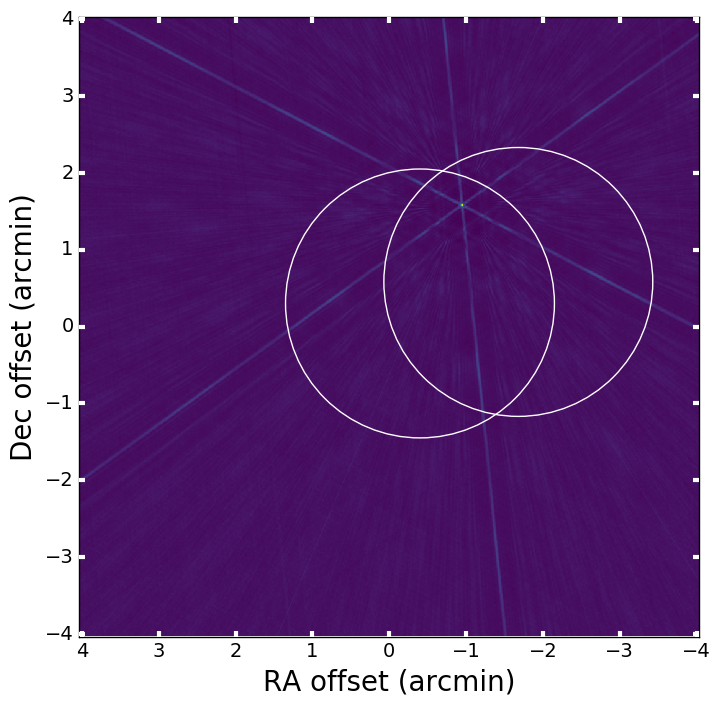

In [13]:
fig = pl.figure(figsize=(8,8))
ax = fig.add_subplot(111)
pl.imshow(imsky, interpolation='nearest', cmap='viridis', aspect='auto', extent=extent)
cir1 = pl.Circle((-0.4, 0.3), 3.5/2, fill=False, color='w')
cir2 = pl.Circle((-1.68, 0.58), 3.5/2, fill=False, color='w')
ax.add_artist(cir1)
ax.add_artist(cir2)
pl.xlabel('RA offset (arcmin)', fontsize=20)
pl.ylabel('Dec offset (arcmin)', fontsize=20)
xt = pl.setp(ax.get_xticklabels(), fontsize=14)
yt = pl.setp(ax.get_yticklabels(), fontsize=14)
ax.xaxis.set_tick_params(width=3, color='w')
ax.yaxis.set_tick_params(width=3, color='w')